In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Cropped')

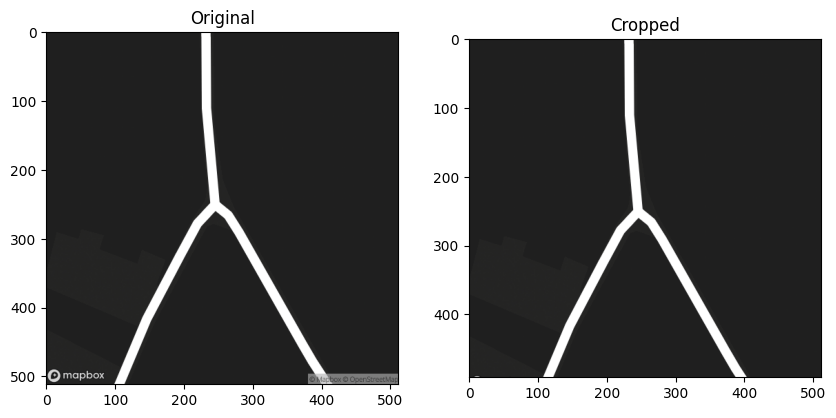

In [51]:
# mapbox_image1.png open and remove last few rows
path = "/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Industrieel/UGent_2022-2023/VENTOUX_v1.0/mapbox_image1.png"

image = cv2.imread(path)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the number of rows to remove from the bottom
rows_to_remove = 20  

# Calculate the new height of the image after removing rows
new_height = image.shape[0] - rows_to_remove

# Remove the last rows from the image
image_cropped = image[:new_height, :]

# Show the original and cropped images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB))
plt.title('Cropped')

In [ ]:
# print(image_cropped)
step = 10 
height = image_cropped.shape[0]
# now calculate a histogram of the white values every 10 rows
# for i in range(0, height, step):
#     print(f"Row {i}")
#     row = image_cropped[i,:]
#     plt.plot(row)
#     plt.show()

# now do the same for the columns
width = image_cropped.shape[1]
for i in range(0, width, step):
    print(f"Column {i}")
    column = image_cropped[:,i]
    plt.plot(column)
    plt.show()


# for i in range(0, height, step):
#     histogram = np.sum(image_cropped[i:i+step,:], axis=0)
#     plt.plot(histogram)
#     plt.show()

# Harris corner detection to detect the corners

(492, 512, 3)
(492, 512)


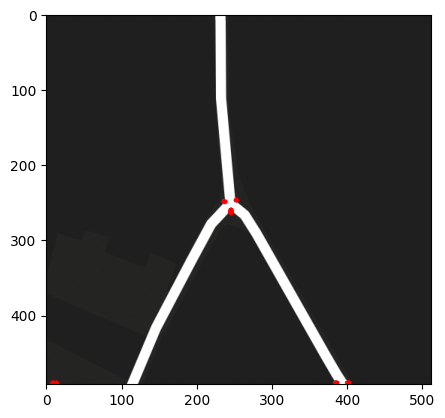

In [52]:
# detect corners using harris corner detection
image_cropped_gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

dst = cv2.cornerHarris(image_cropped_gray, 3, 5, 0.04)
# dst = cv2.dilate(dst, None)
print(image_cropped.shape)
print(dst.shape)

# Threshold for an optimal value, it may vary depending on the image
# Now go over each element of dst and see if it is greater than threshold
for i in range(dst.shape[0]):
    for j in range(dst.shape[1]):
        if dst[i,j]>0.01*dst.max():
            cv2.circle(image_cropped, (j,i), 3, (0, 0, 255), -1)

plt.imshow(cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB))
plt.show()
